In [2]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg

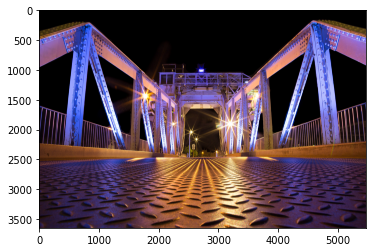

In [4]:
def ReadImage(img_file):
    img = mpimg.imread(img_file)
    plt.imshow(img)
    return img
img = ReadImage("./Image.jpg")

In [5]:
# Assign value to centroids
k = 3
label_arr = np.zeros(img.shape[:2])
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        label_arr[i,j] = np.random.choice(k)
label_arr = label_arr.astype("int32")

KeyboardInterrupt: 

In [ ]:
# Define the pth order distance matrix :-
def dist_p(vect1, vect2, p=2):
    l = len(vect1)
    s = 0
    for i in range(l):
        diff = np.abs(vect2[i] - vect1[i])
        s += (diff**p)
    dist = s**(1/p)
    return dist

In [ ]:
# Define func to generate initial mean value from initial value
def init_mean(k, img, label_arr):
    mean_cent = []
    pixel_cent = [[] for k in range(k)]
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            pixel_cent[label_arr[i, j]].append(img[i, j])
            for k in range(k):
                all_vect = np.matrix(pixel_cent[k])
                mean_k = np.mean(all_vect, axis = 0)
                mean_cent.append(np.ravel(mean_k))
            return mean_cent

In [ ]:
# Update labels by comparing distances with previous mean values & generate new labels
def label_update(prev_mean, img, label_arr, p=2):
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            dist_cent = []
            for k in range(len(prev_mean)):
                dist_cent.append(dist_p(img[i, j, :], prev_mean[k]))
            dist_cent = np.array(dist_cent)
            new_label = np.argmin(dist_cent)
            label_arr[i, j] = new_label
    return label_arr        

In [ ]:
# Generate new mean values from updated label
def mean_from_label(k, prev_mean, img, label_arr):
    pixel_cent = [[] for k in range(k)]
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            pixel_cent[label_arr[i, j]].append(img[i, j])
            for k in range(k):
                if len(pixel_cent[k])!=0:
                    pixel_mat = np.matrix(pixel_cent[k])
                    new_mean = np.mean(pixel_mat, axis = 0)
                    prev_mean[k] = np.ravel(new_mean)
            return prev_mean

In [ ]:
# Run the k-means algo & obtain final labels and mean
def kmeans(img, label_arr, k, maxiter):
    mean_old = init_mean(k, img, label_arr)
    for it in range(maxiter):
        new_label = label_update(mean_old, img, label_arr)
        mean_new = mean_from_label(k, mean_old, img, label_arr)
        print("The mean obtained at {i} iteration is {mean}".format(i = it, mean = mean_new))
        label_arr = new_label
        mean_old = mean_new
    return mean_new, label_arr

In [ ]:
# Use the finally obtained mean and label to segment image
mean_centr, label_arr = kmeans(img, label_arr, k, 3)
def segment_img(img, label_arr, mean_centr):
    seg_img = np.zeros(img.shape)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            k = label_arr[i,j]
            seg_img[i, j, :] = mean_cent[int(k)]
            seg_img = seg_img.astype("uint8")
            plt.imshow(seg_img)

In [ ]:
segment_img(img, label_arr, mean_centr)